In [4]:
import pandas as pd
import numpy as np

#read the dsn data into a dataframe

super = pd.read_csv('supmkt.csv')
super.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [5]:
super.describe() # 5 numerical columns

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [6]:
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket_Size                  3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [7]:
super.isnull().sum() 

Product_Identifier                   0
Supermarket_Identifier               0
Product_Supermarket_Identifier       0
Product_Weight                     802
Product_Fat_Content                  0
Product_Shelf_Visibility             0
Product_Type                         0
Product_Price                        0
Supermarket_Opening_Year             0
Supermarket_Size                  1450
Supermarket_Location_Type            0
Supermarket_Type                     0
Product_Supermarket_Sales            0
dtype: int64

In [8]:
len(super.Supermarket_Type.unique())

4

In [9]:
super1 = super.drop(['Product_Identifier', 'Supermarket_Identifier','Product_Supermarket_Identifier' ], axis=1)
super1.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [10]:
super1.info()  # so here i am working with 10 columns, after removing the 3 useless ones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 10 columns):
Product_Weight               4188 non-null float64
Product_Fat_Content          4990 non-null object
Product_Shelf_Visibility     4990 non-null float64
Product_Type                 4990 non-null object
Product_Price                4990 non-null float64
Supermarket_Opening_Year     4990 non-null int64
Supermarket_Size             3540 non-null object
Supermarket_Location_Type    4990 non-null object
Supermarket_Type             4990 non-null object
Product_Supermarket_Sales    4990 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 389.9+ KB


In [11]:
super1_corr = super1.corr()    # checking how the numerical columns are corr to the label
super1_corr.Product_Supermarket_Sales.sort_values(ascending=False)  #basically i am treating the numerical columns first

Product_Supermarket_Sales    1.000000
Product_Price                0.518285
Supermarket_Opening_Year     0.051297
Product_Weight               0.015322
Product_Shelf_Visibility    -0.164943
Name: Product_Supermarket_Sales, dtype: float64

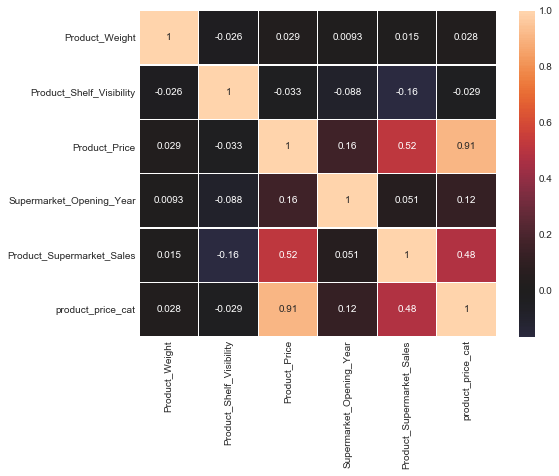

In [67]:
#  generating a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

heatmap = super1.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(heatmap, center=0, annot=True, linewidth=.3)

In [13]:
#super.isnull().sum()

# lemme create a pairplot for rhe dataset, ill drop the missing values for thia to work
# on a second thought NO. its for visualisations. i am too excited to do that. maybe later

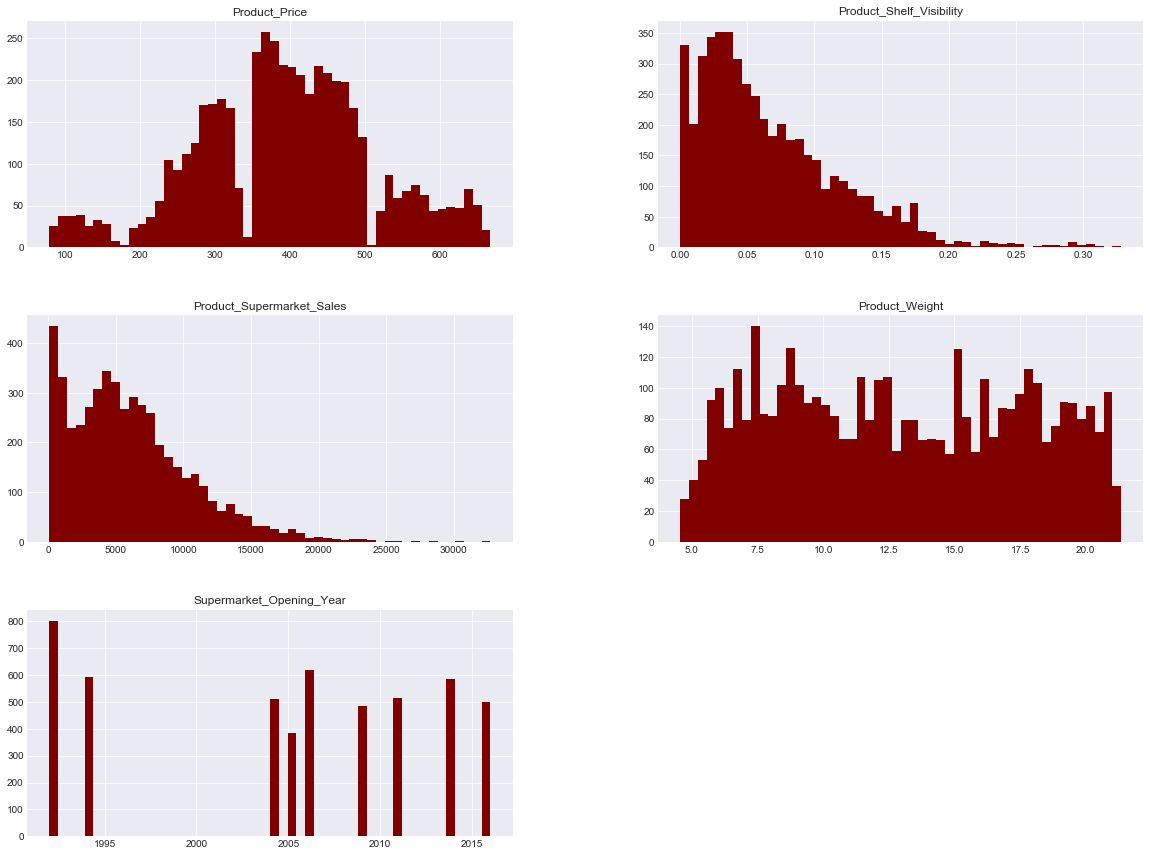

In [14]:
# instead i would visualise the whole datasat distribution in a histogram. 

# when i say the whole dataset here i mean all the numerical values in the dataset
super_vis = super1.hist(bins=50, figsize=(20, 15), color='maroon')

# done. now this is looking interesting lemme take some notes

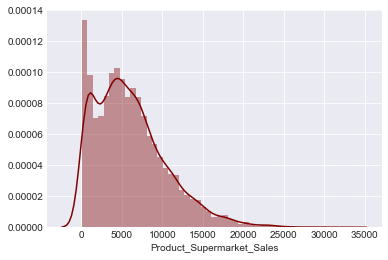

In [15]:
#  building a distplot for all the numerical datasets or for the categorical just because i feel like oo
sns.distplot(super1.Product_Supermarket_Sales, color='maroon')
plt.show()

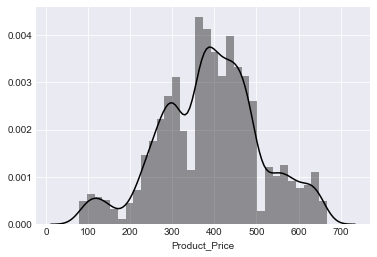

In [16]:
#  since i couldnt get the separate test dataset. i wud have to split this into train and test. using and experimenting
# the stratified sampling i made a tutorial for.. LEGGO!!



# no time to waste the most correlated column to the target is product_price so i would visualise that now and 
#then stratify the dataset with respect to that

sns.distplot(super1.Product_Price, color='k', hist=True)
plt.show()

# done so the distro is even kind of normal sef. i'll just go ahead and stratify WRT this

In [17]:
# so here i am deviding the product price column by 66.7 devided the max by 10 to reduce the class. normally
# there shouldnt be too many classes. and map the values ro a new column called product_price_cat

super1['product_price_cat'] = np.ceil(super.Product_Price / 66.7)
super1['product_price_cat'].value_counts().sort_index()

# so now we can see the distribution among the classes is not even, so i would map 2,3, and 4 to 5. 
# and also map 11, 10, and 9 to 8

2.0      156
3.0      111
4.0      416
5.0      879
6.0     1050
7.0     1155
8.0      603
9.0      350
10.0     269
11.0       1
Name: product_price_cat, dtype: int64

In [18]:
# map those above 8 as 8. i am doing this so each class would habe near distro of numbers
super1['product_price_cat'].where(super1['product_price_cat'] < 8, 8.0, inplace=True)
super1['product_price_cat'].value_counts().sort_index()

2.0     156
3.0     111
4.0     416
5.0     879
6.0    1050
7.0    1155
8.0    1223
Name: product_price_cat, dtype: int64

In [19]:
# next up, map those below 5 as 5. i am doing this so each class would habe near distro of numbers
super1['product_price_cat'].where(super1['product_price_cat'] > 5, 5.0, inplace=True)
super1['product_price_cat'].value_counts().sort_index()
# DONE!!

5.0    1562
6.0    1050
7.0    1155
8.0    1223
Name: product_price_cat, dtype: int64

In [20]:
# now its time for the main the main! :-)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=21)
for train_index, test_index in split.split(super1, super1['product_price_cat']):
    strat_train_set = super1.loc[train_index]
    strat_test_set = super1.loc[test_index]
    
strat_test_set.head()# so i am sure of a low bias testset now.. with about 1000 samples.. phew!!

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,product_price_cat
2929,7.59,Normal Fat,0.145266,Fruits and Vegetables,432.27,2006,Medium,Cluster 1,Supermarket Type1,15579.72,7.0
269,15.85,Low Fat,0.180097,Soft Drinks,143.48,2005,NaN,Cluster 3,Grocery Store,292.95,5.0
1116,15.50,Normal Fat,0.157247,Snack Foods,364.10,2009,NaN,Cluster 2,Supermarket Type1,5517.82,6.0
1703,19.35,Normal Fat,0.062655,Baking Goods,408.30,2009,NaN,Cluster 2,Supermarket Type1,6604.74,7.0
4933,18.20,Low Fat,0.162960,Health and Hygiene,108.77,1994,High,Cluster 3,Supermarket Type1,2676.52,5.0


In [21]:
from sklearn.model_selection import  train_test_split
def product_price_props(data):
    return data['product_price_cat'].value_counts() / len(data)

# initialising the random sampling with train_test_split
trainset, testset = train_test_split(super1, test_size=0.2, random_state=21)

# creating a new df that compares the original supermarket, to the random and stratified ones
compare = pd.DataFrame({
    'Overall': product_price_props(super1),
    'Stratified' : product_price_props(strat_test_set),
    'Random' : product_price_props(testset)
}).sort_index()

compare["Rand. %error"] = 100 * compare["Random"] / compare["Overall"] - 100
compare["Strat. %error"] = 100 * compare["Stratified"] / compare["Overall"] - 100
compare

# done! ...so on two occasions  the strat error was 0.000000 thats how low-bias our dataset is.

,Overall,Random,Stratified,Rand. %error,Strat. %error
5.0,0.313026,0.306613,0.312625,-2.048656,-0.128041
6.0,0.210421,0.206413,0.210421,-1.904762,0.000000
7.0,0.231463,0.237475,0.231463,2.597403,0.000000
8.0,0.245090,0.249499,0.245491,1.798855,0.163532


In [22]:
# so now lets continue torturing the dataset to make it speak

# lets drop the product_price_cat column
for set in (strat_train_set, strat_test_set):
    set.drop('product_price_cat', axis=1, inplace=True)
    
strat_train_set.head()   # showing that the unwanted column has been removed

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
168,14.800,Low Fat,0.044841,Soft Drinks,195.92,1994,High,Cluster 3,Supermarket Type1,2297.01
2139,NaN,Normal Fat,0.187443,Fruits and Vegetables,364.70,1992,Small,Cluster 1,Grocery Store,722.39
2705,5.675,Normal Fat,0.023493,Snack Foods,388.82,2011,Small,Cluster 2,Supermarket Type1,3535.40
1461,10.895,Low Fat,0.035803,Fruits and Vegetables,325.82,2006,Medium,Cluster 1,Supermarket Type1,6261.85
4589,19.600,Low Fat,0.025287,Health and Hygiene,379.51,2004,Small,Cluster 1,Supermarket Type1,3415.55


In [23]:
new_super = strat_train_set
new_super.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
168,14.800,Low Fat,0.044841,Soft Drinks,195.92,1994,High,Cluster 3,Supermarket Type1,2297.01
2139,NaN,Normal Fat,0.187443,Fruits and Vegetables,364.70,1992,Small,Cluster 1,Grocery Store,722.39
2705,5.675,Normal Fat,0.023493,Snack Foods,388.82,2011,Small,Cluster 2,Supermarket Type1,3535.40
1461,10.895,Low Fat,0.035803,Fruits and Vegetables,325.82,2006,Medium,Cluster 1,Supermarket Type1,6261.85
4589,19.600,Low Fat,0.025287,Health and Hygiene,379.51,2004,Small,Cluster 1,Supermarket Type1,3415.55


In [24]:
new_super.columns

Index(['Product_Weight', 'Product_Fat_Content', 'Product_Shelf_Visibility',
       'Product_Type', 'Product_Price', 'Supermarket_Opening_Year',
       'Supermarket_Size', 'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales'],
      dtype='object')

In [25]:
# just another visualisation

# new_super.plot(kind='scatter', x= 'Product_Supermarket_Sales', y= 'Product_Price', alpha=.3) 

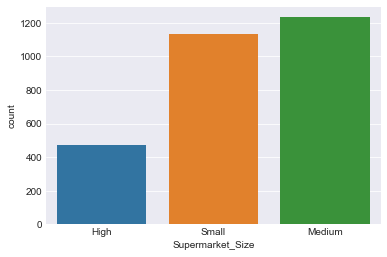

In [26]:
import seaborn as sns      # explore the possiillities of using this countplots for visualising categoricsl columns
cat = sns.countplot(x ='Supermarket_Size', data = new_super)

In [27]:
#  SO I AM DONE WITH EDA TIME TO PREPROCESS THE DATASET, and i will start by segregating the features and label

super_new = new_super.drop('Product_Supermarket_Sales', axis=1)  # features
super_label =new_super['Product_Supermarket_Sales'].copy()

In [28]:
super_new.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year
count,3328.000000,3992.000000,3992.000000,3992.000000
mean,12.888244,0.066841,391.794464,2004.661072
std,4.706246,0.053281,119.673048,8.294933
min,4.555000,0.000000,79.890000,1992.000000
25%,8.630000,0.027289,308.017500,1994.000000
50%,12.650000,0.053498,393.820000,2006.000000
75%,17.100000,0.094626,464.932500,2011.000000
max,21.350000,0.328391,667.220000,2016.000000


In [29]:
super_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3992 entries, 168 to 4798
Data columns (total 9 columns):
Product_Weight               3328 non-null float64
Product_Fat_Content          3992 non-null object
Product_Shelf_Visibility     3992 non-null float64
Product_Type                 3992 non-null object
Product_Price                3992 non-null float64
Supermarket_Opening_Year     3992 non-null int64
Supermarket_Size             2840 non-null object
Supermarket_Location_Type    3992 non-null object
Supermarket_Type             3992 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 471.9+ KB


In [30]:
super_new.isnull().sum() # only product weight and supermarket size have missing rows. one numeric and one categorical
                         # well nothing spoil i am kuku working on numerical columns for now.

Product_Weight                664
Product_Fat_Content             0
Product_Shelf_Visibility        0
Product_Type                    0
Product_Price                   0
Supermarket_Opening_Year        0
Supermarket_Size             1152
Supermarket_Location_Type       0
Supermarket_Type                0
dtype: int64

In [31]:
super_new.Supermarket_Size.value_counts()  # take note to one encode this first before imputer

Medium    1233
Small     1136
High       471
Name: Supermarket_Size, dtype: int64

In [32]:
# call the imputer and use the median strategy

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

# time to separate men from boya. the imputer class only reads numerical. so i want to extract all four of them
super_num = super_new.drop(['Product_Fat_Content', 'Product_Type', 
                            'Supermarket_Size', 'Supermarket_Location_Type', 
                            'Supermarket_Type'], axis=1)
super_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3992 entries, 168 to 4798
Data columns (total 4 columns):
Product_Weight              3328 non-null float64
Product_Shelf_Visibility    3992 non-null float64
Product_Price               3992 non-null float64
Supermarket_Opening_Year    3992 non-null int64
dtypes: float64(3), int64(1)
memory usage: 315.9 KB


In [33]:
imputer.fit(super_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [34]:
imputer.statistics_

array([1.26500000e+01, 5.34981325e-02, 3.93820000e+02, 2.00600000e+03])

In [35]:
x = imputer.transform(super_num)  # output is a 2d array and needs to be converted to a df
x

array([[1.48000000e+01, 4.48409330e-02, 1.95920000e+02, 1.99400000e+03],
       [1.26500000e+01, 1.87443314e-01, 3.64700000e+02, 1.99200000e+03],
       [5.67500000e+00, 2.34925240e-02, 3.88820000e+02, 2.01100000e+03],
       ...,
       [1.26500000e+01, 4.87384070e-02, 3.82170000e+02, 1.99200000e+03],
       [1.28500000e+01, 1.37441201e-01, 3.94160000e+02, 2.00600000e+03],
       [1.26500000e+01, 2.53540720e-02, 3.61190000e+02, 1.99200000e+03]])

In [36]:
super_num_tf = pd.DataFrame(x, columns=super_num.columns)
super_num_tf.isnull().sum()  # transformed and dusted

Product_Weight              0
Product_Shelf_Visibility    0
Product_Price               0
Supermarket_Opening_Year    0
dtype: int64

In [37]:
# dealling with categorical attributes 
super_cat = super_new.drop(['Product_Weight', 'Product_Shelf_Visibility', 
                            'Product_Price', 'Supermarket_Opening_Year'], axis=1)

super_cat.isnull().sum()   # so i can see that the supermarket size column has 1152 missing columns, my methodology is 
                           # to onehotenode all the categorical columns then i would use the imputer class to replace 
                            # with mean. 

Product_Fat_Content             0
Product_Type                    0
Supermarket_Size             1152
Supermarket_Location_Type       0
Supermarket_Type                0
dtype: int64

In [38]:
super_cat.Supermarket_Size.value_counts()

Medium    1233
Small     1136
High       471
Name: Supermarket_Size, dtype: int64

In [39]:
# time to visualise the categorical column using countplot
# on a second thought NO!
from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#super_cat_enc = encoder.fit_transform(super_cat)  so i tried this and found out that LabelEncoder does not work with
                                                # multiple columns. Have to write a custom function

In [40]:
#custom class to handle multiple categorical columns
from sklearn.preprocessing import LabelEncoder
class MultiEncoder:                   # class name
    def __init__(self, columns=None):  # initialise with a constructor
        self.columns = columns
        
    def fit(self, X, y=None):          # Function to fit the X columns of the dataset showing that its for attributes 
        return self                    # alone and y=None means the label is made silent

    def transform(self, X):         # this is the function that does the main work of transforming
        output = X.copy()    # so the class takes only column as argument and if dnt specify it would take all the columns
        if self.columns is not None:   # if the column is not empty
            for col in self.columns:    # for each column
                output[col] = LabelEncoder().fit_transform(col)  # encode each column
        else:                                                   #else
            for colname, col in output.iteritems():             #basically encode whatever you give it
                output[colname] = LabelEncoder().fit_transform(col)
        return output                                             # bring out the output
    
    def fit_transform(self, X, y=None):                         # fit_transsform function takes only one attribute
        return self.fit(X, y=None).transform(X)                  # return the final transformed label encoded
    

In [41]:
col_transformed = MultiEncoder().fit_transform(super_cat.astype(str))
#super_cat.Product_Type.shape
col_transformed.head()

,Product_Fat_Content,Product_Type,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type
168,0,14,0,2,1
2139,1,6,2,0,0
2705,1,13,2,1,1
1461,0,6,1,0,1
4589,0,8,2,0,1


In [42]:
col_transformed.Supermarket_Size.value_counts()

1    1233
3    1152
2    1136
0     471
Name: Supermarket_Size, dtype: int64

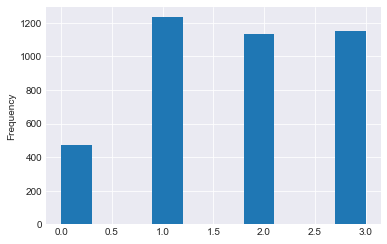

In [43]:
col_transformed.Supermarket_Size.plot(kind='hist')  # come back and revert to this when fine tuning use this instead of the other

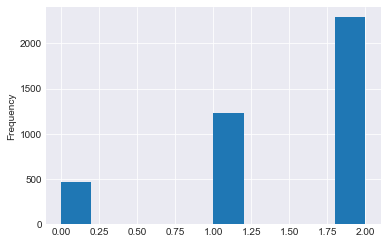

In [44]:
real_col_tr= col_transformed.replace(to_replace=3, value=2)
real_col_tr.Supermarket_Size.plot(kind='hist')

In [45]:
from sklearn.preprocessing import OneHotEncoder    #automatically labelencoder has solved the problem of missing data
encoder = OneHotEncoder(sparse=False)
super_1hot = encoder.fit_transform(real_col_tr)
super_1hot

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [46]:
# creating a pipeline for the operations but before that,
# creating a dataframe selector

from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelect(BaseEstimator, TransformerMixin):
    def __init__(self, attrNames):
        self.attrNames = attrNames
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attrNames].values
        
    

In [47]:
num_attr = list(super_num)
cat_attr = list(super_cat)

num_attr

['Product_Weight',
 'Product_Shelf_Visibility',
 'Product_Price',
 'Supermarket_Opening_Year']

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# numerical pipeline all set and Kicking LIve!!!
num_pipeline = Pipeline([
    ('selector', DataFrameSelect(num_attr)),
    ('imputer', Imputer(strategy='median')),
    ('std_scalar', StandardScaler())]) 

super_num_tr = num_pipeline.fit_transform(super_num)
super_num_tr.shape

(3992, 4)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Categorical columns up Next!
cat_pipeline = Pipeline([
    ('selector', DataFrameSelect(cat_attr)),
    ('encoder', OneHotEncoder(sparse=False))
])    # To be continued from here. unless they bring light till Night then. By God's grace.
                              # I am so grateful to God for the Jobb opportunity at RETINA AI HEALTH INC

cat_num_tr = cat_pipeline.fit_transform(real_col_tr)
#cat_num_tr.shape   visualising the shape of the transformed categorical columns

In [50]:
# QUICK HEADS UP, the full_pipeline had to get an all integer column argument, so i had concatenate the super_num
# and the already LabelEncoded super_cat which is either real_col_tr or col_transformed

finals = pd.concat([super_num, real_col_tr], axis=1)
finals.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3992 entries, 168 to 4798
Data columns (total 9 columns):
Product_Weight               3328 non-null float64
Product_Shelf_Visibility     3992 non-null float64
Product_Price                3992 non-null float64
Supermarket_Opening_Year     3992 non-null int64
Product_Fat_Content          3992 non-null int64
Product_Type                 3992 non-null int64
Supermarket_Size             3992 non-null int64
Supermarket_Location_Type    3992 non-null int64
Supermarket_Type             3992 non-null int64
dtypes: float64(3), int64(6)
memory usage: 471.9 KB


In [51]:
#  TIME TO COMBINE THE FEATURES TOGETHER USING SKLEARN'S FEATUREUNION CLASS

from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

final_super = full_pipeline.fit_transform(finals)

#len(real_col_tr)
#len(super_num)
# DONE!!!! MODEL TI YA
final_super.shape

(3992, 31)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression(n_jobs=-1, normalize=True)
lr.fit(final_super, super_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [53]:
lr_predictions = lr.predict(final_super)
mse = mean_squared_error(super_label, lr_predictions)
lr_rmse = np.sqrt(mse)
lr_rmse

2955.3230406752223

In [54]:
#bring agbawo cross_validation_score inside

from sklearn.model_selection import cross_val_score
lr_score = cross_val_score(lr, final_super, super_label, 
                           scoring = 'neg_mean_squared_error', cv=10, n_jobs = 25)
lrmse = np.sqrt(-lr_score)

def show_result(score):         # Custom function to show scores, mean and std
    print('scores lr: ', score)
    print('')
    print('mean score lr: ',score.mean())
    print('')
    print('std dev lr: +/-', score.std())
    
show_result(lrmse)

scores lr:  [2751.3418031  3236.30626631 3032.88802879 2866.4740299  2977.5126406
 2802.2373171  2955.13533032 2931.13314173 3133.14679221 3080.93781657]

mean score lr:  2976.711316664467

std dev lr: +/- 142.05948439296213


In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dtr = DecisionTreeRegressor(max_depth=15)

dtscores  = cross_val_score(dtr, final_super, super_label, 
                            scoring='neg_mean_squared_error', cv=10, n_jobs=15)
drmse = np.sqrt(-dtscores)

def show_result(score):         # Custom function to show scores, mean and std
    print('scores dtr: ', score)
    print('')
    print('mean score dtr: ',score.mean())
    print('')
    print('std dev dtr: +/-', score.std())
    
show_result(drmse)

scores dtr:  [3768.1705032  3937.24014988 3828.87075979 3859.83551582 3795.30419741
 3985.52002004 4005.05208291 3688.64452352 4163.22771531 3834.55164838]

mean score dtr:  3886.641711627395

std dev dtr: +/- 130.8465667174785


In [56]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=1500, n_estimators=50, n_jobs=25, warm_start=True, max_leaf_nodes=1200)

rscores = cross_val_score(rfr, final_super, super_label, 
                         scoring='neg_mean_squared_error', cv=10, n_jobs=50)

rfrmse = np.sqrt(-rscores)

def show_result(score):         # Custom function to show scores, mean and std
    print('scores RandomForestRegressor: ', score)
    print('')
    print('mean score RandomForestRegressor: ',score.mean())
    print('')
    print('std dev RandomForestRegressor: +/-', score.std())
    
show_result(rfrmse)

scores RandomForestRegressor:  [2912.94349144 3391.20157111 3093.04674676 3184.26850196 3094.57969443
 3018.28405624 3055.76980795 2991.48830806 3230.13307796 3135.77363261]

mean score RandomForestRegressor:  3110.748888853198

std dev RandomForestRegressor: +/- 128.23220249833642


In [57]:
#rfr.fit(final_super, super_label)

In [58]:
clf = RandomForestRegressor()
clf.fit(final_super, super_label)
Fi = (clf.feature_importances_ * 100).astype(int)

In [59]:
final_super_df = pd.DataFrame(final_super)
fi_check = final_super_df.drop([4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,
                    19,20,21,22,23,24,25,26,27,29,30], axis=1)

clf = RandomForestRegressor()
clf.fit(fi_check, super_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [60]:
Fi = (clf.feature_importances_ * 100).astype(int)
Fi

array([ 8, 14, 34, 18, 24])

In [61]:
rft = RandomForestRegressor()

rscores = cross_val_score(rfr, fi_check, super_label, 
                         scoring='neg_mean_squared_error', cv=10, n_jobs=50)

rfrmse = np.sqrt(-rscores)

def show_result(score):         # Custom function to show scores, mean and std
    print('scores RandomForestRegressor: ', score)
    print('')
    print('mean score RandomForestRegressor: ',score.mean())
    print('')
    print('std dev RandomForestRegressor: +/-', score.std())
    
show_result(rfrmse)

scores RandomForestRegressor:  [2862.94621374 3402.5651512  3144.03380496 3201.77536054 3004.2834622
 2979.71842969 3105.39988813 3004.46180943 3353.1835201  3140.8885537 ]

mean score RandomForestRegressor:  3119.92561936883

std dev RandomForestRegressor: +/- 159.5703137511844


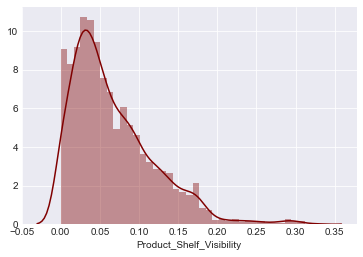

In [66]:
sns.distplot(super_num.Product_Shelf_Visibility, color='maroon')